In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('ggplot')
%matplotlib inline

### Data

In [247]:
sale = pd.read_excel("UNO_Sale_vs_RCVD.xlsx")
sale.columns = sale.columns.str.replace(" ","_")
sale.columns

Index(['STYLE#', 'COLOR', 'DESCRIPTION', 'CUST_#', 'INVC_DATE', 'QTY',
       'UNIT_PRICE', 'EXT-AMT', 'REASON', 'IMPORT_HANDMADE', 'MANUFACTORS',
       'State_sold', 'ZIP_sold', 'RELEASED_YEAR', 'Seasos', 'Season_target',
       'LAST_RCVD', 'FIRST_RCVD', 'LAST_INVOICED', 'FIRST_INVOICED'],
      dtype='object')

In [248]:
sale.shape

(111043, 20)

In [278]:
sale.dtypes

STYLE#                     object
COLOR                      object
DESCRIPTION                object
CUST_#                     object
INVC_DATE          datetime64[ns]
QTY                         int64
UNIT_PRICE                float64
EXT-AMT                   float64
REASON                     object
IMPORT_HANDMADE            object
MANUFACTORS                object
State_sold                 object
ZIP_sold                   object
RELEASED_YEAR              object
Seasos                     object
Season_target              object
LAST_RCVD                  object
FIRST_RCVD                 object
LAST_INVOICED      datetime64[ns]
FIRST_INVOICED     datetime64[ns]
dtype: object

In [281]:
sale.LAST_RCVD = sale.LAST_RCVD.replace('NO DATA',np.nan)
sale.LAST_RCVD = pd.to_datetime(sale.LAST_RCVD, format='%y-%m-%d')
sale.LAST_RCVD.head()

0   2016-04-12
1   2016-04-12
2   2016-04-12
3   2016-04-11
4   2016-04-11
Name: LAST_RCVD, dtype: datetime64[ns]

In [250]:
sale.head()

,STYLE#,COLOR,DESCRIPTION,CUST_#,INVC_DATE,QTY,UNIT_PRICE,EXT-AMT,REASON,IMPORT_HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED_YEAR,Seasos,Season_target,LAST_RCVD,FIRST_RCVD,LAST_INVOICED,FIRST_INVOICED
0,DTA1A9500,IV,SEED BEAD ANKLET,CB001,2016-04-12,144,4.00,576.0,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2016-04-12 00:00:00,2016-04-12 00:00:00,2018-10-03,2016-04-12
1,DTA1A9500,MUL,SEED BEAD ANKLET,CB001,2016-04-12,144,4.00,576.0,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2016-04-12 00:00:00,2016-04-12 00:00:00,2018-10-03,2016-04-12
2,DTA1A9500,TQ,SEED BEAD ANKLET,CB001,2016-04-12,144,4.00,576.0,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2016-04-12 00:00:00,2016-04-12 00:00:00,2018-10-03,2016-04-12
3,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,CHE005,2016-05-20,12,3.25,39.0,NaN,IMPORT,NOBLES,LA,71235,2016,2016 1ST,SS16,2016-04-11 00:00:00,2016-04-04 00:00:00,2018-10-03,2016-04-04
4,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,GMA01,2016-08-22,24,3.25,78.0,NaN,IMPORT,NOBLES,0,0,2016,2016 1ST,SS16,2016-04-11 00:00:00,2016-04-04 00:00:00,2018-10-03,2016-04-04


In [251]:
sale.apply(lambda x: x.isna().sum()/len(sale)).sort_values(ascending=False)

REASON             0.976333
COLOR              0.035860
MANUFACTORS        0.000729
DESCRIPTION        0.000045
FIRST_INVOICED     0.000000
CUST_#             0.000000
INVC_DATE          0.000000
QTY                0.000000
UNIT_PRICE         0.000000
EXT-AMT            0.000000
IMPORT_HANDMADE    0.000000
LAST_INVOICED      0.000000
State_sold         0.000000
ZIP_sold           0.000000
RELEASED_YEAR      0.000000
Seasos             0.000000
Season_target      0.000000
LAST_RCVD          0.000000
FIRST_RCVD         0.000000
STYLE#             0.000000
dtype: float64

In [252]:
inv = pd.read_excel("UNO_inventory_item.xlsx")
inv.columns = inv.columns.str.replace(" ","_")
inv.columns

Index(['STYLE#', 'COLOR', 'Description', 'LAST_RCVD', 'Qty', 'On-Hand',
       'CB_Reason', 'ToWH'],
      dtype='object')

In [253]:
inv.shape

(144726, 8)

In [254]:
inv.head(10)

,STYLE#,COLOR,Description,LAST_RCVD,Qty,On-Hand,CB_Reason,ToWH
0,DTA1A9500,IV,SEED BEAD ANKLET,2016-04-12,-144.0,0.0,NaN,NaN
1,DTA1A9500,IV,SEED BEAD ANKLET,2016-04-12,144.0,0.0,NaN,NaN
2,DTA1A9500,MUL,SEED BEAD ANKLET,2016-04-12,-144.0,0.0,NaN,NaN
3,DTA1A9500,MUL,SEED BEAD ANKLET,2016-04-12,144.0,0.0,NaN,NaN
4,DTA1A9500,TQ,SEED BEAD ANKLET,2016-04-12,-144.0,0.0,NaN,NaN
5,DTA1A9500,TQ,SEED BEAD ANKLET,2016-04-12,144.0,0.0,NaN,NaN
6,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,2016-04-04,120.0,0.0,NaN,NaN
7,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,2016-04-04,-12.0,0.0,SEED BEAD ANKLET_,NaN
8,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,2016-04-06,-12.0,0.0,NaN,NaN
9,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,2016-04-11,240.0,0.0,NaN,NaN


In [255]:
inv.dtypes

STYLE#                 object
COLOR                  object
Description            object
LAST_RCVD      datetime64[ns]
Qty                   float64
On-Hand               float64
CB_Reason              object
ToWH                  float64
dtype: object

In [256]:
inv = inv.drop(columns=['CB_Reason','ToWH'])

In [257]:
inv.apply(lambda x: x.isna().sum()/len(inv)).sort_values(ascending=False)

COLOR          0.057343
Description    0.000111
On-Hand        0.000007
Qty            0.000007
LAST_RCVD      0.000007
STYLE#         0.000000
dtype: float64

In [258]:
inv.dropna(subset=['Qty'], inplace=True)
inv.apply(lambda x: x.isna().sum()/len(inv)).sort_values(ascending=False)

COLOR          0.057336
Description    0.000104
On-Hand        0.000000
Qty            0.000000
LAST_RCVD      0.000000
STYLE#         0.000000
dtype: float64

### Merge Data

In [259]:
unodf = pd.merge(inv, sale, how='left', left_on=['STYLE#','COLOR','Description'],\
                 right_on=['STYLE#','COLOR','DESCRIPTION'])

In [260]:
unodf.head(10)

,STYLE#,COLOR,Description,LAST_RCVD_x,Qty,On-Hand,DESCRIPTION,CUST_#,INVC_DATE,QTY,...,MANUFACTORS,State_sold,ZIP_sold,RELEASED_YEAR,Seasos,Season_target,LAST_RCVD_y,FIRST_RCVD,LAST_INVOICED,FIRST_INVOICED
0,DTA1A9500,IV,SEED BEAD ANKLET,2016-04-12,-144.0,0.0,SEED BEAD ANKLET,CB001,2016-04-12,144.0,...,ICC,FL,33708,2016,2016 1ST,SS16,2016-04-12 00:00:00,2016-04-12 00:00:00,2018-10-03,2016-04-12
1,DTA1A9500,IV,SEED BEAD ANKLET,2016-04-12,144.0,0.0,SEED BEAD ANKLET,CB001,2016-04-12,144.0,...,ICC,FL,33708,2016,2016 1ST,SS16,2016-04-12 00:00:00,2016-04-12 00:00:00,2018-10-03,2016-04-12
2,DTA1A9500,MUL,SEED BEAD ANKLET,2016-04-12,-144.0,0.0,SEED BEAD ANKLET,CB001,2016-04-12,144.0,...,ICC,FL,33708,2016,2016 1ST,SS16,2016-04-12 00:00:00,2016-04-12 00:00:00,2018-10-03,2016-04-12
3,DTA1A9500,MUL,SEED BEAD ANKLET,2016-04-12,144.0,0.0,SEED BEAD ANKLET,CB001,2016-04-12,144.0,...,ICC,FL,33708,2016,2016 1ST,SS16,2016-04-12 00:00:00,2016-04-12 00:00:00,2018-10-03,2016-04-12
4,DTA1A9500,TQ,SEED BEAD ANKLET,2016-04-12,-144.0,0.0,SEED BEAD ANKLET,CB001,2016-04-12,144.0,...,ICC,FL,33708,2016,2016 1ST,SS16,2016-04-12 00:00:00,2016-04-12 00:00:00,2018-10-03,2016-04-12
5,DTA1A9500,TQ,SEED BEAD ANKLET,2016-04-12,144.0,0.0,SEED BEAD ANKLET,CB001,2016-04-12,144.0,...,ICC,FL,33708,2016,2016 1ST,SS16,2016-04-12 00:00:00,2016-04-12 00:00:00,2018-10-03,2016-04-12
6,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,2016-04-04,120.0,0.0,3 ROW WOOD BEAD STRETCH BR,CHE005,2016-05-20,12.0,...,NOBLES,LA,71235,2016,2016 1ST,SS16,2016-04-11 00:00:00,2016-04-04 00:00:00,2018-10-03,2016-04-04
7,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,2016-04-04,120.0,0.0,3 ROW WOOD BEAD STRETCH BR,GMA01,2016-08-22,24.0,...,NOBLES,0,0,2016,2016 1ST,SS16,2016-04-11 00:00:00,2016-04-04 00:00:00,2018-10-03,2016-04-04
8,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,2016-04-04,120.0,0.0,3 ROW WOOD BEAD STRETCH BR,HIS001,2016-08-03,12.0,...,NOBLES,CA,92821,2016,2016 1ST,SS16,2016-04-11 00:00:00,2016-04-04 00:00:00,2018-10-03,2016-04-04
9,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,2016-04-04,120.0,0.0,3 ROW WOOD BEAD STRETCH BR,HIS001,2016-08-25,-12.0,...,NOBLES,CA,92821,2016,2016 1ST,SS16,2016-04-11 00:00:00,2016-04-04 00:00:00,2018-10-03,2016-04-04


In [261]:
unodf.drop(columns=['QTY','DESCRIPTION'],inplace=True)

In [262]:
unodf['TotalQty'] = [abs(x) for x in unodf['Qty']]
unodf['QtyShipped'] = [x if x > 0 else 0 for x in unodf['Qty']]

In [263]:
unodf['On-Hand'].describe()

count    1.168470e+06
mean     7.024572e+01
std      4.100131e+02
min     -1.504600e+04
25%      0.000000e+00
50%      1.200000e+01
75%      9.600000e+01
max      1.000000e+04
Name: On-Hand, dtype: float64

### EDA

In [283]:
perM = sale.LAST_RCVD.dt.to_period("M")
perY = sale.LAST_RCVD.dt.to_period("Y")
unobyM = sale.groupby(perM)
unobyY = sale.groupby(perY)

In [285]:
unobyM.head()

,STYLE#,COLOR,DESCRIPTION,CUST_#,INVC_DATE,QTY,UNIT_PRICE,EXT-AMT,REASON,IMPORT_HANDMADE,MANUFACTORS,State_sold,ZIP_sold,RELEASED_YEAR,Seasos,Season_target,LAST_RCVD,FIRST_RCVD,LAST_INVOICED,FIRST_INVOICED
0,DTA1A9500,IV,SEED BEAD ANKLET,CB001,2016-04-12,144,4.00,576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2016-04-12,2016-04-12 00:00:00,2018-10-03,2016-04-12
1,DTA1A9500,MUL,SEED BEAD ANKLET,CB001,2016-04-12,144,4.00,576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2016-04-12,2016-04-12 00:00:00,2018-10-03,2016-04-12
2,DTA1A9500,TQ,SEED BEAD ANKLET,CB001,2016-04-12,144,4.00,576.00,NaN,IMPORT,ICC,FL,33708,2016,2016 1ST,SS16,2016-04-12,2016-04-12 00:00:00,2018-10-03,2016-04-12
3,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,CHE005,2016-05-20,12,3.25,39.00,NaN,IMPORT,NOBLES,LA,71235,2016,2016 1ST,SS16,2016-04-11,2016-04-04 00:00:00,2018-10-03,2016-04-04
4,DTA1B2029,WG-COR,3 ROW WOOD BEAD STRETCH BR,GMA01,2016-08-22,24,3.25,78.00,NaN,IMPORT,NOBLES,0,0,2016,2016 1ST,SS16,2016-04-11,2016-04-04 00:00:00,2018-10-03,2016-04-04
11,DTA1B2029,WG-CRM,3 ROW PEARL BEAD STRETCH BR,FAS001,2016-08-23,24,3.25,78.00,NaN,IMPORT,NOBLES,CA,90058,2017,2017 1ST,SS17,2017-01-18,2016-04-04 00:00:00,2018-10-03,2016-04-04
12,DTA1B2029,WG-CRM,3 ROW PEARL BEAD STRETCH BR,HIS001,2016-08-03,12,3.25,39.00,NaN,IMPORT,NOBLES,CA,92821,2017,2017 1ST,SS17,2017-01-18,2016-04-04 00:00:00,2018-10-03,2016-04-04
13,DTA1B2029,WG-CRM,3 ROW PEARL BEAD STRETCH BR,HIS001,2016-08-25,-12,3.25,-39.00,RETUR,IMPORT,NOBLES,CA,92821,2017,2017 1ST,SS17,2017-01-18,2016-04-04 00:00:00,2018-10-03,2016-04-04
14,DTA1B2029,WG-CRM,3 ROW PEARL BEAD STRETCH BR,JUJ001,2016-08-02,12,3.25,39.00,NaN,IMPORT,NOBLES,LA,70360,2017,2017 1ST,SS17,2017-01-18,2016-04-04 00:00:00,2018-10-03,2016-04-04
15,DTA1B2029,WG-CRM,3 ROW PEARL BEAD STRETCH BR,KEN002,2016-05-25,12,3.25,39.00,NaN,IMPORT,NOBLES,TX,75207,2017,2017 1ST,SS17,2017-01-18,2016-04-04 00:00:00,2018-10-03,2016-04-04


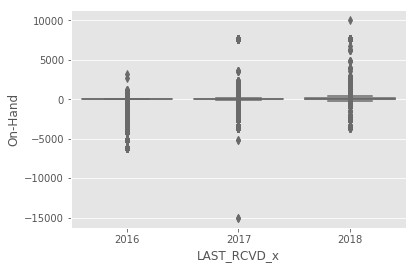

In [266]:
boxYtotal = sns.boxplot(x=perY, y=unodf['On-Hand'], palette="Set3")

In [286]:
plt.figure(figsize=(10,8))
unobyM.sum()['On-Hand'].plot(title='Average Inventory per Month')
plt.show()

KeyError: 'On-Hand'

<Figure size 720x576 with 0 Axes>

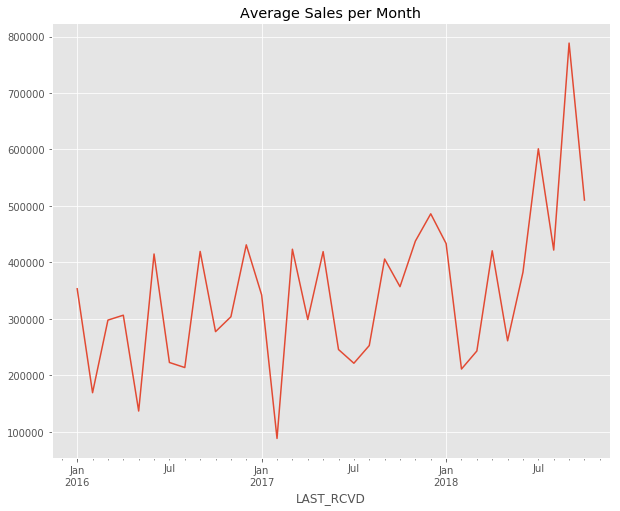

In [287]:
plt.figure(figsize=(10,8))
unobyM.sum()['EXT-AMT'].plot(title='Average Sales per Month')
plt.show()

In [269]:
unodf.loc[(unodf['IMPORT_HANDMADE']=='HAND MADE')]

,STYLE#,COLOR,Description,LAST_RCVD_x,Qty,On-Hand,CUST_#,INVC_DATE,UNIT_PRICE,EXT-AMT,...,ZIP_sold,RELEASED_YEAR,Seasos,Season_target,LAST_RCVD_y,FIRST_RCVD,LAST_INVOICED,FIRST_INVOICED,TotalQty,QtyShipped
12732,DTA1E113,G-BLA,13X13 M/M / NATURAL STONE,2016-03-11,-24.0,-36.0,JOI001,2016-03-11,3.5,84.0,...,90021,BEFORE 2016,BEFORE 2016 1ST,OLD,NO DATA,NO DATA,2018-10-03,2016-03-11,24.0,0.0
12733,DTA1E113,G-BLA,13X13 M/M / NATURAL STONE,2016-03-11,-24.0,-36.0,SMT001,2016-03-24,3.5,42.0,...,30340,BEFORE 2016,BEFORE 2016 1ST,OLD,NO DATA,NO DATA,2018-10-03,2016-03-11,24.0,0.0
12734,DTA1E113,G-BLA,13X13 M/M / NATURAL STONE,2016-03-24,-12.0,-36.0,JOI001,2016-03-11,3.5,84.0,...,90021,BEFORE 2016,BEFORE 2016 1ST,OLD,NO DATA,NO DATA,2018-10-03,2016-03-11,12.0,0.0
12735,DTA1E113,G-BLA,13X13 M/M / NATURAL STONE,2016-03-24,-12.0,-36.0,SMT001,2016-03-24,3.5,42.0,...,30340,BEFORE 2016,BEFORE 2016 1ST,OLD,NO DATA,NO DATA,2018-10-03,2016-03-11,12.0,0.0
12736,DTA1E113,G-CHA,13X13 M/M / NATURAL STONE,2016-03-11,-24.0,-36.0,JOI001,2016-03-11,3.5,84.0,...,90021,BEFORE 2016,BEFORE 2016 1ST,OLD,NO DATA,NO DATA,2018-10-03,2016-03-11,24.0,0.0
12737,DTA1E113,G-CHA,13X13 M/M / NATURAL STONE,2016-03-11,-24.0,-36.0,KEL003,2016-04-12,3.5,42.0,...,77005,BEFORE 2016,BEFORE 2016 1ST,OLD,NO DATA,NO DATA,2018-10-03,2016-03-11,24.0,0.0
12738,DTA1E113,G-CHA,13X13 M/M / NATURAL STONE,2016-04-12,-12.0,-36.0,JOI001,2016-03-11,3.5,84.0,...,90021,BEFORE 2016,BEFORE 2016 1ST,OLD,NO DATA,NO DATA,2018-10-03,2016-03-11,12.0,0.0
12739,DTA1E113,G-CHA,13X13 M/M / NATURAL STONE,2016-04-12,-12.0,-36.0,KEL003,2016-04-12,3.5,42.0,...,77005,BEFORE 2016,BEFORE 2016 1ST,OLD,NO DATA,NO DATA,2018-10-03,2016-03-11,12.0,0.0
12740,DTA1E113,G-HOW,13X13 M/M / NATURAL STONE,2016-03-11,-24.0,-36.0,JOI001,2016-03-11,3.5,84.0,...,90021,BEFORE 2016,BEFORE 2016 1ST,OLD,NO DATA,NO DATA,2018-10-03,2016-03-11,24.0,0.0
12741,DTA1E113,G-HOW,13X13 M/M / NATURAL STONE,2016-03-11,-24.0,-36.0,SMT001,2016-03-24,3.5,42.0,...,30340,BEFORE 2016,BEFORE 2016 1ST,OLD,NO DATA,NO DATA,2018-10-03,2016-03-11,24.0,0.0


### Categorization

In [270]:
item_name = inv.groupby("Description").agg({"STYLE#": pd.Series.nunique}).sort_values("STYLE#", ascending=False).index
item_name = [x.split() for x in item_name]
item_name

[['NECKLACE'],
 ['METAL', 'DROP', 'ER'],
 ['LONG', 'NECKLACE'],
 ['METAL', 'HOOP', 'ER'],
 ['WORD', 'PENDANT', 'NK', '16', '+3'],
 ['RING'],
 ['INSPIRATIONAL', 'BRACELET'],
 ['EARRINGS'],
 ['STRETCH', 'BRACELET'],
 ['SHORT', 'BEADED', 'NECKLACE', 'WITH', 'BAR'],
 ['30', 'NATURAL', 'STONE', 'PENDANT'],
 ['LONG', 'BEADED', 'NECKLACE', 'WITH', 'BAR'],
 ['28', 'INSPIRATION', 'NK'],
 ['LONG', 'NECKLACE', 'SET'],
 ['BEADED', 'STRETCH', 'BRACELET'],
 ['INSPIRATIONAL', 'CHARM', 'NECKLACE'],
 ['INSPIRATION', 'WORD', 'BAR', 'NK'],
 ['INSPIRATION', 'ADJUSTABLE', 'BR'],
 ['12', 'KIDS', 'STONE', 'BR'],
 ['GD', 'ADJUSTABLE', 'DISK', 'CHAIN', 'BR'],
 ['30', 'DOUBLE', 'SIDE', 'FAN', 'TASSEL', 'NK'],
 ['ADJUSTABLE', 'BRACELET'],
 ['GOLD', 'DIPPED', 'FEATHER', 'NK'],
 ['14', 'KIDS', 'NK'],
 ['SHORT', 'NECKLACE'],
 ['30', '+3', 'GOOLD', 'CHAIN', 'NK'],
 ['METAL', 'POST', 'ER'],
 ['BEADED', 'STRETCH', 'BR'],
 ['18', 'POMPOM', 'W', 'THREAD', 'TSSEL', 'NK'],
 ['FOOD', 'SHORT', 'NECKLACE'],
 ['16', '+3', 'GO